### Remeshing Function Trial

Import, initialize mesh and function spaces.

In [1]:
import firedrake
import icepack
import matplotlib.pyplot as plt
import numpy as np

Lx = 100e3
nx = 72

# mesh1d = firedrake.IntervalMesh(nx, Lx)
# mesh = firedrake.ExtrudedMesh(mesh1d, layers=1)

# Q = firedrake.FunctionSpace(mesh, "CG", 1, vfamily="R", vdegree=0)
# V = firedrake.FunctionSpace(mesh, "CG", 1, vfamily="GL", vdegree=2)

mesh = firedrake.IntervalMesh(nx, Lx)
Q = firedrake.FunctionSpace(mesh, "CG", 1)
V = firedrake.VectorFunctionSpace(mesh, "CG", 1)

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


Define initial geometry.

In [2]:
from firedrake import max_value, min_value

# x, z = firedrake.SpatialCoordinate(mesh)
x, = firedrake.SpatialCoordinate(mesh)

b_in, b_out = 100, -100
base_x = b_in - (b_in - b_out) * x/Lx
b = firedrake.interpolate(base_x, Q)

s_in, s_out = 850, 0
surface_x = s_in - (s_in - s_out) * x/Lx
s0 = firedrake.interpolate(surface_x, Q)

h_in, h_out = s_in - b_in, -100
height_x = h_in - (h_in - h_out) * x/Lx
h0 = firedrake.interpolate(height_x,Q)

Plot profile.

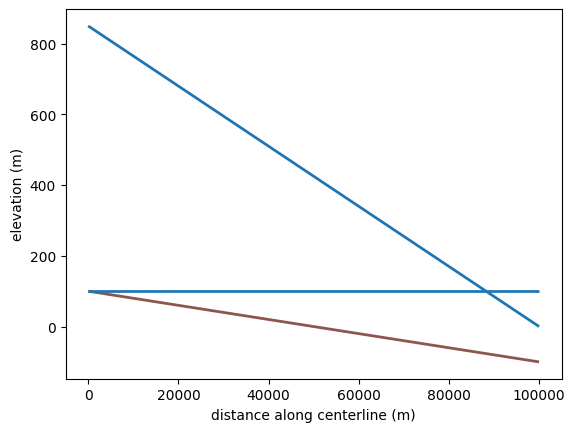

In [3]:
fig, axes = plt.subplots()
axes.set_xlabel("distance along centerline (m)")
axes.set_ylabel("elevation (m)")

# firedrake.plot(icepack.depth_average(b), edgecolor="tab:brown", axes=axes)
# zb0 = firedrake.interpolate(s0-h0, Q)
# firedrake.plot(icepack.depth_average(zb0), edgecolor="tab:blue", axes = axes)
# firedrake.plot(icepack.depth_average(s0), edgecolor="tab:blue", axes = axes);

firedrake.plot(b, edgecolor="tab:brown", axes=axes)
zb0 = firedrake.interpolate(s0-h0, Q)
firedrake.plot(zb0, edgecolor="tab:blue", axes = axes)
firedrake.plot(s0, edgecolor="tab:blue", axes = axes);

Find point where height = 0.

In [4]:
print(h0.dat.data_ro)

zero_pt = np.nan
for idx in reversed(range(len(h0.dat.data_ro))):
    if h0.dat.data_ro[idx] <= 0:
        zero_pt = idx
    
print(zero_pt)
print(h0.dat.data_ro[zero_pt])

stretch = (zero_pt - 1)/nx
print(stretch)

[ 750.          738.19444444  726.38888889  714.58333333  702.77777778
  690.97222222  679.16666667  667.36111111  655.55555556  643.75
  631.94444444  620.13888889  608.33333333  596.52777778  584.72222222
  572.91666667  561.11111111  549.30555556  537.5         525.69444444
  513.88888889  502.08333333  490.27777778  478.47222222  466.66666667
  454.86111111  443.05555556  431.25        419.44444444  407.63888889
  395.83333333  384.02777778  372.22222222  360.41666667  348.61111111
  336.80555556  325.          313.19444444  301.38888889  289.58333333
  277.77777778  265.97222222  254.16666667  242.36111111  230.55555556
  218.75        206.94444444  195.13888889  183.33333333  171.52777778
  159.72222222  147.91666667  136.11111111  124.30555556  112.5
  100.69444444   88.88888889   77.08333333   65.27777778   53.47222222
   41.66666667   29.86111111   18.05555556    6.25         -5.55555556
  -17.36111111  -29.16666667  -40.97222222  -52.77777778  -64.58333333
  -76.38888889  -88

Compress mesh coordinates?

In [59]:
new_mesh = firedrake.Mesh(mesh)

Vc = mesh.coordinates.function_space()
f = firedrake.Function(Vc).interpolate(firedrake.as_vector([x*stretch, z]))
mesh.coordinates.assign(f);

TypeError: expected str, bytes or os.PathLike object, not MeshGeometry

In [38]:
print(h0.dat.data_ro)

[ 750.          738.19444444  726.38888889  714.58333333  702.77777778
  690.97222222  679.16666667  667.36111111  655.55555556  643.75
  631.94444444  620.13888889  608.33333333  596.52777778  584.72222222
  572.91666667  561.11111111  549.30555556  537.5         525.69444444
  513.88888889  502.08333333  490.27777778  478.47222222  466.66666667
  454.86111111  443.05555556  431.25        419.44444444  407.63888889
  395.83333333  384.02777778  372.22222222  360.41666667  348.61111111
  336.80555556  325.          313.19444444  301.38888889  289.58333333
  277.77777778  265.97222222  254.16666667  242.36111111  230.55555556
  218.75        206.94444444  195.13888889  183.33333333  171.52777778
  159.72222222  147.91666667  136.11111111  124.30555556  112.5
  100.69444444   88.88888889   77.08333333   65.27777778   53.47222222
   41.66666667   29.86111111   18.05555556    6.25         -5.55555556
  -17.36111111  -29.16666667  -40.97222222  -52.77777778  -64.58333333
  -76.38888889  -88

In [48]:
h1 = firedrake.Function(h0)
new_mesh = firedrake.Mesh(h1)
h1 = firedrake.Function(firedrake.functionspaceimpl.WithGeometry.create(h0.function_space(), mesh), val=h0.topological)

ValueError: Coordinates must be from a rank-1 FunctionSpace with rank-1 value_shape.

In [46]:
print(h1.dat.data_ro)

[ 750.          738.19444444  726.38888889  714.58333333  702.77777778
  690.97222222  679.16666667  667.36111111  655.55555556  643.75
  631.94444444  620.13888889  608.33333333  596.52777778  584.72222222
  572.91666667  561.11111111  549.30555556  537.5         525.69444444
  513.88888889  502.08333333  490.27777778  478.47222222  466.66666667
  454.86111111  443.05555556  431.25        419.44444444  407.63888889
  395.83333333  384.02777778  372.22222222  360.41666667  348.61111111
  336.80555556  325.          313.19444444  301.38888889  289.58333333
  277.77777778  265.97222222  254.16666667  242.36111111  230.55555556
  218.75        206.94444444  195.13888889  183.33333333  171.52777778
  159.72222222  147.91666667  136.11111111  124.30555556  112.5
  100.69444444   88.88888889   77.08333333   65.27777778   53.47222222
   41.66666667   29.86111111   18.05555556    6.25         -5.55555556
  -17.36111111  -29.16666667  -40.97222222  -52.77777778  -64.58333333
  -76.38888889  -88